Ingrese el nombre del usuario: Ana Sofía Calle
Ingrese el número de vecinos K: 5
Vecinos más cercanos de Ana Sofía Calle:
   Vecino: Lina Landys | Distancia: 0.2206
   Vecino: Camila Lerma | Distancia: 0.2606
   Vecino: Natalia Jimenez | Distancia: 0.2761
   Vecino: Juan Esteban Velasco | Distancia: 0.2911
   Vecino: Monk | Distancia: 0.3199
------------------------------


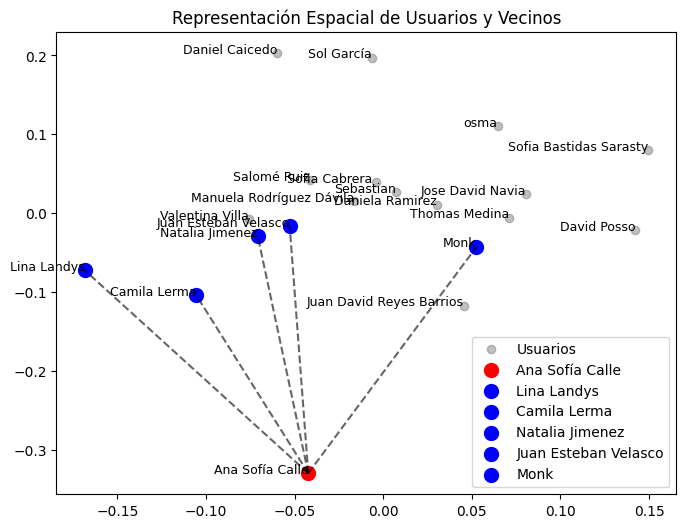

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances
from sklearn.manifold import MDS

# Cargar la base de datos desde la URL
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQqiwcRAJ3JlylV18B85B21gSgodfCidSptZp2fV6m16NIp4gy5Ol6mddqC5GLHF_hVM0lUOBo57c0s/pub?gid=0&single=true&output=csv"
df = pd.read_csv(url)

# Suponiendo que la primera columna tiene los nombres de los usuarios
nombres_usuarios = df.iloc[:, 0]  # Guardamos los nombres
df_numeric = df.iloc[:, 1:].select_dtypes(include=[np.number])  # Tomamos solo datos numéricos

# Calcular la distancia del coseno entre los usuarios
dist_matrix = cosine_distances(df_numeric)

# Función para encontrar los K vecinos más cercanos de un usuario
def encontrar_vecinos(nombre_usuario, k):
    if nombre_usuario not in nombres_usuarios.values:
        return f"Usuario {nombre_usuario} no encontrado."

    usuario_idx = nombres_usuarios[nombres_usuarios == nombre_usuario].index[0]
    distancias = dist_matrix[usuario_idx]
    vecinos_idx = np.argsort(distancias)[1:k+1]  # Ignoramos el usuario mismo

    vecinos = [(nombres_usuarios[i], distancias[i]) for i in vecinos_idx]

    # Mostrar resultados numéricos
    print(f"Vecinos más cercanos de {nombre_usuario}:")
    for vecino, distancia in vecinos:
        print(f"   Vecino: {vecino} | Distancia: {distancia:.4f}")
    print("-" * 30)

    return vecinos

# Función para graficar la distribución en el espacio
def graficar_espacialmente(nombre_usuario, k):
    vecinos = encontrar_vecinos(nombre_usuario, k)
    if isinstance(vecinos, str):
        print(vecinos)
        return

    # Aplicamos MDS para reducir la dimensionalidad a 2D
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(dist_matrix)

    plt.figure(figsize=(8, 6))

    # Graficar todos los usuarios
    plt.scatter(coords[:, 0], coords[:, 1], color='gray', alpha=0.5, label='Usuarios')

    # Resaltar usuario seleccionado
    usuario_idx = nombres_usuarios[nombres_usuarios == nombre_usuario].index[0]
    plt.scatter(coords[usuario_idx, 0], coords[usuario_idx, 1], color='red', label=nombre_usuario, s=100)

    # Resaltar vecinos
    for vecino, _ in vecinos:
        vecino_idx = nombres_usuarios[nombres_usuarios == vecino].index[0]
        plt.scatter(coords[vecino_idx, 0], coords[vecino_idx, 1], color='blue', label=vecino, s=100)
        plt.plot([coords[usuario_idx, 0], coords[vecino_idx, 0]],
                 [coords[usuario_idx, 1], coords[vecino_idx, 1]], 'k--', alpha=0.6)  # Línea de conexión

    # Etiquetas
    for i, nombre in enumerate(nombres_usuarios):
        plt.text(coords[i, 0], coords[i, 1], nombre, fontsize=9, ha='right')

    plt.title("Representación Espacial de Usuarios y Vecinos")
    plt.legend()
    plt.show()

# Pedir datos al usuario
nombre_usuario = input("Ingrese el nombre del usuario: ")
k = int(input("Ingrese el número de vecinos K: "))

# Mostrar la visualización espacial
graficar_espacialmente(nombre_usuario, k)

**Reflexión**

Dentro del contexto de una pizzería, un algoritmo KNN puede utilizarse para recomendar productos basándose en las similitudes de gustos entre clientes. Por ejemplo, si un cliente ha hecho un pedido específico, el sistema puede buscar a otros clientes con preferencias similares y recomendarle lo que ellos también han pedido.

Esto puede tener varios efectos, como que el cliente podría comprar más si alguna recomendación le resulta antojable.

Podría salirse de sus prefrencias habituales y probar algo nuevo, tras ver las elecciones de personas con gustos parecidos.

Incluso podría decidir agregar acompañamientos o una bebida recomendada, haciendo que consuma más.

Aunque en este ejercicio solo trabajamos con preferencias relacionadas con las pizzas, en la realidad de un restaurante, el consumo suele ir acompañado de otras decisiones como entradas, postres, bebidas, etc. Por eso, tiene mucho sentido pensar que este tipo de sistema podría extenderse fácilmente más allá de las pizzas, ayudando a generar recomendaciones más completas y personalizadas.

**Ejemplo otro contexto**

Otro contexto en el que el algoritmo KNN puede aplicarse es en una tienda de ropa. En este caso, el algoritmo puede detectar, a partir del interés de un cliente en una prenda específica, qué otras personas con gustos similares han buscado o comprado.

Con base en esta información, el sistema puede recomendarle otras prendas que los vecinos cercanos también han mirado.

Combinaciones o prendas complementarias que suelen comprarse junto a la prenda de interés (como accesorios, chaquetas o zapatos).

Esto puede llevar a que el cliente, aumente su compra, al sentirse atraído por más de una prenda de ropa que inicialmente quería, o incluso termine comprando un conjunto entero, en lugar de solo la prenda inicial que buscaba, porque las recomendaciones le parecieron atractivas y bien combinadas.

Este tipo de sistema podría mejorar la experiencia de compra, pero, también aumenta las ventas para la tienda al conectar las decisiones de usuarios con preferencias similares.